In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/hey_data.csv',encoding='utf-8')

In [24]:
len(df)

812

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    812 non-null    object
 1   time    424 non-null    object
 2   tweet   812 non-null    object
dtypes: object(3)
memory usage: 19.2+ KB


In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
comments =df['date'].value_counts()

Text(0.5, 1.0, 'Recuento de comentarios por fecha')

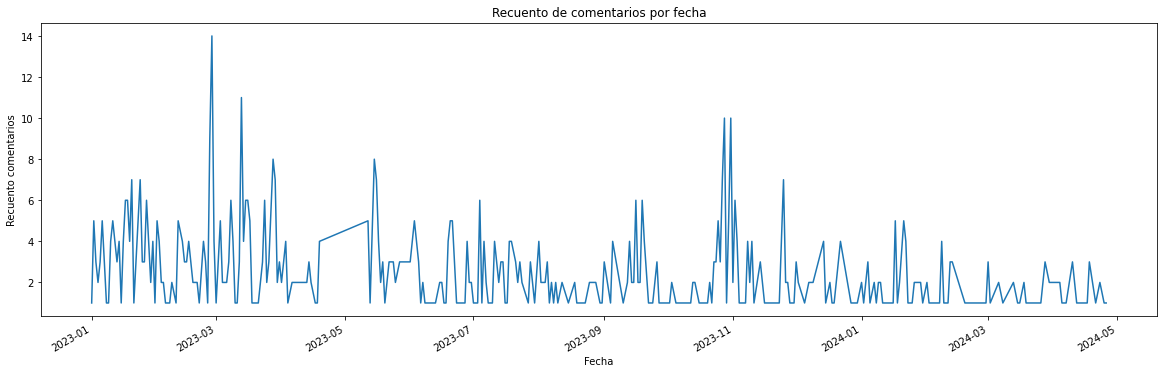

In [28]:
comments.plot(figsize=(20, 6))

# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Recuento comentarios')
plt.title('Recuento de comentarios por fecha')

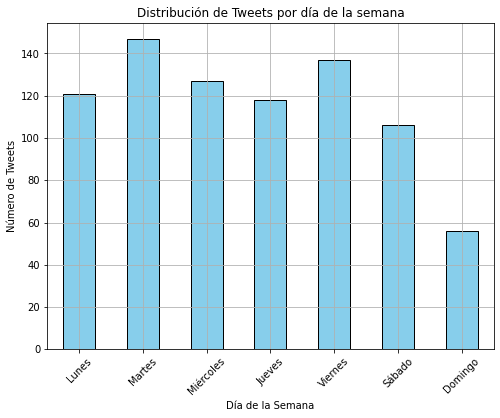

In [29]:
# Extraer el día de la semana de la fecha
df['day_of_week'] = df['date'].dt.dayofweek

# Contar la cantidad de tweets por día de la semana
tweets_by_day_of_week = df['day_of_week'].value_counts().sort_index()

# Graficar la distribución de tweets por día de la semana
plt.figure(figsize=(8, 6))
tweets_by_day_of_week.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Tweets por día de la semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Tweets')
plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], rotation=45)
plt.grid(True)
plt.show()

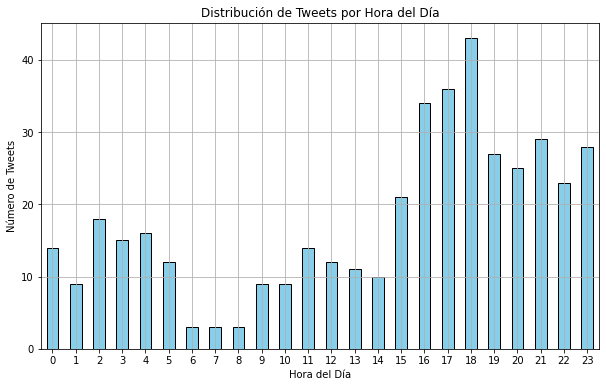

In [30]:
df_notnull = df.dropna(subset=['time']).copy()
df_notnull['hour_of_day'] = df_notnull['time'].str[:2].astype(int)

# Contar la cantidad de tweets por hora del día
tweets_by_hour_of_day = df_notnull['hour_of_day'].value_counts().sort_index()

# Graficar la distribución de tweets por hora del día
plt.figure(figsize=(10, 6))
tweets_by_hour_of_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Tweets por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Tweets')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [31]:
comments = pd.DataFrame({'fecha': comments.index, 'num_comentarios': comments.values})

In [32]:
comments.max()

fecha              2024-04-26 00:00:00
num_comentarios                     14
dtype: object

In [136]:
comentarios_probables = {
    "Servicio al cliente": [
        "rápido", "amable", "eficiente", "respuesta", "resolucion", "ayuda","gracias","Gracias", "facil", "resuelto","servicio","suficiente","agradece","recom"
    ],
    "Experiencia de usuario": [
        "facil", "interfaz", "políticas claras", "conveniente", "servicios en línea", "app","aplicacion","exito","increible","mi banco","mejor"
    ],
    "Productos financieros": [
        "tasa", "tarifas", "cuentas de ahorro", "tarjeta", "prestamos", "TDC","inversion", "rendimiento"
    ],
    "Seguridad": [
        "transacciones", "proteccion", "datos"
    ],
    "Beneficios y promociones": [
        "ofertas", "promociones", "recompensa","gano","ganar", "dorado", "exclusiv","MSI", "gane","ganado","premio","lealtad"
    ],
    "Problemas técnicos": [
        "errores", "fallas", "dificultad","problema", "no puedo"
    ]
}

In [137]:
# Supongamos que tienes un DataFrame df con la columna 'tweet'
from unidecode import unidecode  # Importar la función unidecode

def asignar_tema(tweet):
    for tema, palabras_clave in comentarios_probables.items():
        for palabra in palabras_clave:
            tweet = unidecode(tweet)
            if palabra.lower() in tweet.lower():
                return tema
    return "No clasificado"  # Si no se encuentra ninguna palabra clave, se clasifica como "No clasificado"

# Aplicar la función asignar_tema a cada tweet en la columna 'tweet' del DataFrame
df['categoria'] = df['tweet'].apply(asignar_tema)


In [138]:
df[df.categoria =='No clasificado'][['tweet']].head(50)

,tweet
4,Yeeeei! a través de mi cuenta en acabo de cont...
5,Esta es la señal que necesitan para tener el m...
22,A mí me llegó una semana después aprox
31,Vale estoy esperando
35,Contéstenme por favor
46,Thanks!
50,Me contestaron que sí.
53,Graciaaas.
56,🇬🇹 qué buena onda por vos David 👏👏 a disfrutar...
58,"¡Hola!, me pueden apoyar por favor 😬"


In [139]:
df.categoria.value_counts()

Servicio al cliente         415
No clasificado              245
Experiencia de usuario       72
Productos financieros        51
Beneficios y promociones     20
Problemas técnicos            7
Seguridad                     2
Name: categoria, dtype: int64